In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [36]:
def ker(xs, kertype):
    dx = abs(xs[np.newaxis] - xs[:, np.newaxis])
    if kertype == 'exp':
        return np.exp(-dx) + np.diag(np.ones_like(xs)) / 100.
    elif kertype == 'cos':
        return np.cos(dx) + np.diag(np.ones_like(xs)) / 100.
    else:
        raise ValueError

def gen_sample(xs, size, rng):
    return rng.multivariate_normal(np.zeros(size), ker(xs), size)

def lfi(dmu, cov):
    """Calculate the linear Fisher information from two data matrices.
    Parameters
    ----------
    x0 : ndarray (samples, dim)
    x1 : ndarray (samples, dim)
    dtheta : float
        Change in stimulus between x0 and x1.
    Returns
    -------
    Linear Fisher information
    """
    try:
        return dmu.dot(np.linalg.pinv(cov).dot(dmu.T))
    except np.linalg.LinAlgError:
        return dmu @ np.linalg.solve(cov, dmu.T)

In [41]:
dimlet_size = 2
population_size = 100
samples = 10000
large_samples = 10000
finite_repeats = 101
kertype = 'cos'

In [42]:
dmu = np.ones(dimlet_size)
infinite_lfis = np.zeros(large_samples)
for ii in range(large_samples):
    xs = np.random.randn(dimlet_size) * np.pi * 2.
    corr = ker(xs, kertype)
    infinite_lfis[ii] = lfi(dmu, corr)

In [43]:
finite_lfis = np.zeros((finite_repeats, samples))

for jj in range(finite_repeats):
    xs = np.random.randn(population_size) * np.pi * 2.

    for ii in range(samples):
        xis = np.random.choice(xs, size=dimlet_size, replace=False)
        corr = ker(xis, kertype)
        finite_lfis[jj, ii] = lfi(dmu, corr)

In [ ]:
bins = np.linspace(infinite_lfis.min(), 10, 25)
plt.hist(infinite_lfis, bins=bins, density=True, histtype='step')
_ = plt.hist(np.atleast_2d(finite_lfis)[0], bins=bins, density=True, histtype='step')

In [241]:
infinite_lfis.mean(), finite_lfis.mean()

(6.33746027525607, 6.349839322778145)

In [242]:
infinite_lfis.std(), finite_lfis.std()

(0.7999268075453146, 0.7941520638479653)

In [234]:
y = np.mean(finite_lfis[np.newaxis] > infinite_lfis[:, np.newaxis], axis=0)

ValueError: operands could not be broadcast together with shapes (1,21,100000) (100000,1) 

In [ ]:
x = np.argsort(np.argsort(finite_lfis)) / samples
plt.figure(figsize=(8, 8))
plt.scatter(y, x, s=.1)
plt.plot([0, 1], [0, 1])
plt.ylabel('Estimated percentile')
plt.xlabel('True percentile')

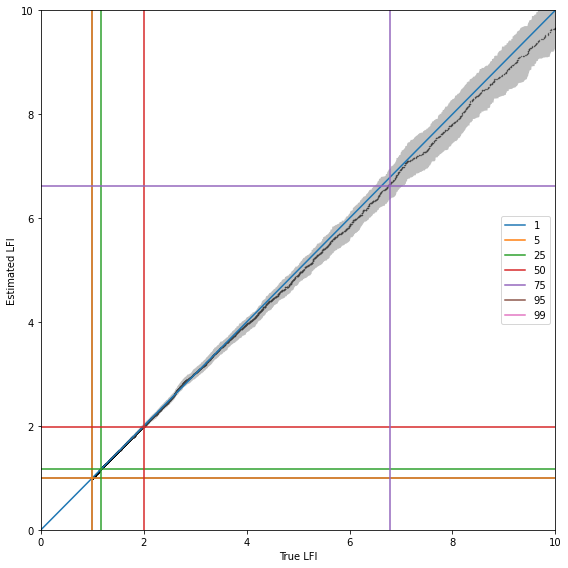

In [45]:
plt.figure(figsize=(8, 8))
x = np.sort(infinite_lfis)
y = np.sort(finite_lfis, axis=1)
median = np.median(y, axis=0)
plt.scatter(x, median, s=.1, c='k')
plt.fill_between(x, np.percentile(y, 50-34, axis=0), np.percentile(y, 50+34, axis=0), fc='gray', alpha=.5)
m = max(infinite_lfis.max(), finite_lfis.max())
plt.plot([0, m], [0, m])
plt.xlabel('True LFI')
plt.ylabel('Estimated LFI')
plt.xlim(*np.percentile(infinite_lfis, [.5, 99.5]))
plt.ylim(*np.percentile(infinite_lfis, [.5, 99.5]))
plt.xlim(0, 10)
plt.ylim(0, 10)
ps = [1, 5, 25, 50, 75, 95, 99]
for ii, p in enumerate(ps):
    plt.axhline(np.percentile(finite_lfis, p), 0, 1, c=f'C{ii}', label=f'{p}')
    plt.axvline(np.percentile(infinite_lfis, p), 0, 1, c=f'C{ii}')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(f'{kertype}_{population_size}_{dimlet_size}.jpg', dpi=300)

In [9]:
infinite_lfis.max(), finite_lfis.max()

(9.134001467809966, 9.498268138615284)